In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [6]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

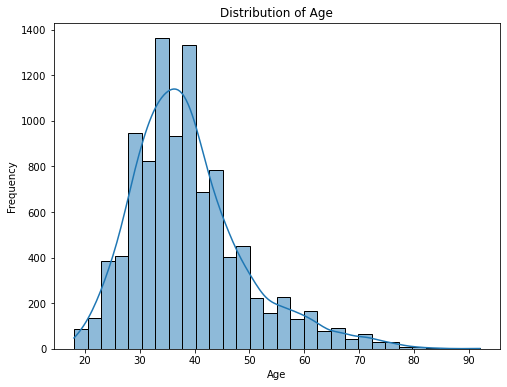

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


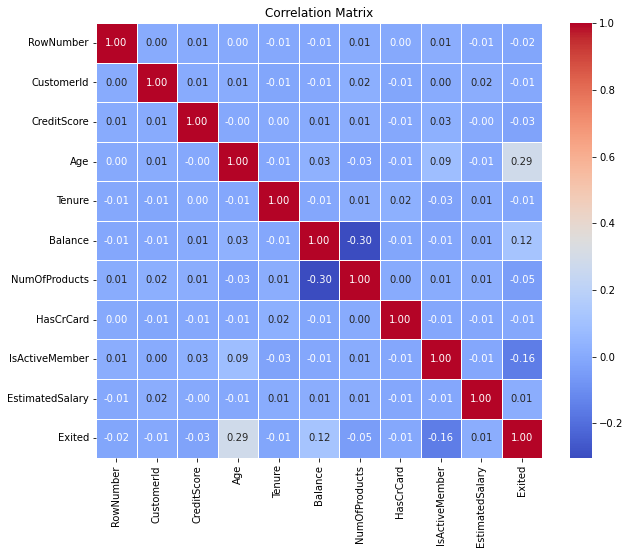

In [8]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [49]:
def sigmoid(z):
    z = np.clip(z, -10, 10)
    op = 1/(1 + np.exp(-z))
    return op

In [18]:
def compute_cost(X , y , w , b ):
    row , col = X.shape
    cost = 0
    for i in range(row):
        z_wb_i = np.dot(X[i] , w) + b
        f_wb_i = sigmoid(z_wb_i)
        cost += -1 * (y[i] * np.log(f_wb_i)) - ((1 - y[i]) * (np.log(1 - f_wb_i)))
    cost = cost / ( row)
    return cost

In [19]:
def compute_gradient(X , y , w , b ):
    row , col = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(row):
        loss = sigmoid(np.dot(X[i] , w) + b)
        for j in range(col):
            dj_dw[j] += (1 / row) * loss * X[i][j]
        dj_db +=  (loss/row)
    return dj_dw , dj_db

In [39]:
def gradient_descent(X , y , w , b , learning_rate , iterations):
    weights_bias_history = []
    cost_history = []
    for i in range(iterations):
        dj_dw , dj_db = compute_gradient(X , y , w , b )
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        weights_bias_history.append((np.round(w,3),np.round(b,3)))
        cost = compute_cost(X , y , w , b)
        cost_history.append(np.round(cost , 3))
    return weights_bias_history , cost_history , w , b

In [13]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data['CreditScore'] = data['CreditScore'] / 100
data['EstimatedSalary'] /= 100
data['Balance'] /= 10000

In [11]:
for i in range(len(data['Balance'])):
    if data['Balance'][i] == 0:
        data['Balance'][i] = data['Balance'].mean()

C:\Users\91733\AppData\Local\Temp\ipykernel_16628\3596388222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Balance'][i] = data['Balance'].mean()


In [12]:
for i in range(len(data['Gender'])):
    if data['Gender'][i] == 'Male':
        data['Gender'][i] = 1
    else:
        data['Gender'][i] = 0

C:\Users\91733\AppData\Local\Temp\ipykernel_16628\2818159435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][i] = 0
C:\Users\91733\AppData\Local\Temp\ipykernel_16628\2818159435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][i] = 1


In [21]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,6.19,France,0,42,2,7.648589,1,1,1,1013.4888,1
1,2,15647311,Hill,6.08,Spain,0,41,1,8.380786,1,0,1,1125.4258,0
2,3,15619304,Onio,5.02,France,0,42,8,15.966080,3,1,0,1139.3157,1
3,4,15701354,Boni,6.99,France,0,39,1,7.649354,2,0,0,938.2663,0
4,5,15737888,Mitchell,8.50,Spain,0,43,2,12.551082,1,1,1,790.8410,0


In [13]:
X = data[['Gender' , 'Age' , 'HasCrCard' , 'IsActiveMember' , 'CreditScore'  , 'Tenure' , 'Balance' , 'EstimatedSalary' ]]
y = data['Exited']

In [14]:
features = np.array(X.values.tolist())
target = np.array(y.values.tolist())

In [51]:
w = np.array([2.7 , 2.9 , 3.5 , 3.25 , 3.43 , 3.50 , 2.75 , 2.8])
b = 5

In [60]:
weights_and_bias , cost_history , final_weights , final_bias = gradient_descent(features , target , w , b , 0.01 , 17500)

In [54]:
for i in range(len(cost_history)):
    if i % 1500 == 0:
        print(f"Iteration {i}:  w: {weights_and_bias[i][0]}  b:{weights_and_bias[i][1]}   COST: {cost_history[i]}")

Iteration 0:  w: [ 2.695  2.511  3.493  3.245  3.365  3.45   2.64  -7.209]  b:4.99   COST: 2.111
Iteration 1500:  w: [ 2.65  -0.819  3.434  3.2    2.818  2.973  1.742 -8.469]  b:4.907   COST: 2.044
Iteration 3000:  w: [ 2.638 -1.415  3.42   3.191  2.714  2.861  1.584 -9.176]  b:4.892   COST: 2.038
Iteration 4500:  w: [ 2.635 -1.546  3.418  3.188  2.689  2.838  1.547 -9.861]  b:4.888   COST: 2.037
Iteration 6000:  w: [  2.633  -1.601   3.418   3.186   2.679   2.83    1.53  -10.544]  b:4.886   COST: 2.037
Iteration 7500:  w: [  2.633  -1.634   3.417   3.186   2.673   2.825   1.52  -11.225]  b:4.886   COST: 2.037
Iteration 9000:  w: [  2.632  -1.662   3.417   3.185   2.669   2.822   1.512 -11.907]  b:4.885   COST: 2.037
Iteration 10500:  w: [  2.632  -1.689   3.416   3.185   2.664   2.818   1.505 -12.589]  b:4.884   COST: 2.037
Iteration 12000:  w: [  2.632  -1.715   3.416   3.185   2.66    2.815   1.497 -13.27 ]  b:4.883   COST: 2.037
Iteration 13500:  w: [  2.631  -1.742   3.415   3.184

In [55]:
print(f"Initial weights : {w}    Inital bias : {b}  Initial cost : {cost_history[0]}")
print(f"Final weights : {final_weights}    Final bias : {final_bias}  Final cost: {cost_history[len(cost_history) - 1]}")

Initial weights : [2.7  2.9  3.5  3.25 3.43 3.5  2.75 2.8 ]    Inital bias : 5  Initial cost : 2.111
Final weights : [  2.63034383  -1.81250611   3.41389872   3.18329555   2.64359495
   2.80236735   1.46960661 -15.76892312]    Final bias : 4.88094453423574  Final cost: 2.037


In [58]:
def predict(w , b , x):
    g = sigmoid(np.dot(w,x) + b)
    if g * 100 >= 0.5:
        print("THE CUSTOMER WILL LIKELY CHURN")
    else:
        print("THE CUSTOMER WILL LIKELY STAY")

In [59]:
ch = int(input("CUSTOMER CHURN PREDICTOR:\nPRESS 1 TO START\nPRESS 0 TO EXIT\n: "))
while ch == 1:
    x = []
    gender = int(input("Enter the Gender\nMALE: 1  FEMALE: 0:\n "))
    x.append(gender)
    age = int(input("Enter the age of the customer: "))
    x.append(age)
    hscrd = int(input("Does the user own a credit card?\nYES: 1   NO: 0\n"))
    x.append(hscrd)
    actv = int(input("Is the user an active member?\nYES: 1   NO: 0\n"))
    x.append(actv)
    c_score = float(input("Enter the credit score: "))
    c_score = c_score / 100
    x.append(c_score)
    tenure = int(input("Enter the tenure: "))
    x.append(tenure)
    balance = float(input("Enter the balance: "))
    balance = balance / 10000
    x.append(balance)
    est_sal = float(input("Enter the estimated salary: "))
    est_sal = est_sal / 100
    x.append(est_sal)
    predict(final_weights , final_bias , x)
    ch = int(input("Do you want to continue? (YES: 1 / NO: 0): "))

CUSTOMER CHURN PREDICTOR:
PRESS 1 TO START
PRESS 0 TO EXIT
: 1
Enter the Gender
MALE: 1  FEMALE: 0:
 1
Enter the age of the customer: 45
Does the user own a credit card?
YES: 1   NO: 0
1
Is the user an active member?
YES: 1   NO: 0
0
Enter the credit score: 654
Enter the tenure: 1
Enter the balance: 9987680
Enter the estimated salary: 125000
THE CUSTOMER WILL LIKELY STAY
Do you want to continue? (YES: 1 / NO: 0): 0
